ディレクトリ構成：  
```
./
├train_seq2seq.ipynb(このファイル)
├model/
│   └(モデルパラメータキャッシュファイル)
├dataset/
├result/
│   └(実行結果CSVと学習曲線グラフ画像)
└src/
   ├common/
   ├dataset/
   ├attention_layer.py
   ├attention_seq2seq.py
   ├peeky_seq2seq.py
   └seq2seq.py
```

In [109]:
# 変数の全消去
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [110]:
# coding: utf-8
import sys
sys.path.append("./src")
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
from dataset.sequence import TextSequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq
from attention_seq2seq import AttentionSeq2seq

In [111]:
# matplotlibのインライン表示
%matplotlib inline
# モジュールの更新時に自動で再読み込み
%reload_ext autoreload
%autoreload 2

In [112]:
# ファイルパスの設定
dataset_dir =Path('./src/dataset')
vocab_csv = [dataset_dir /  "interpretation_train43_and_test40_rev2.csv", dataset_dir / "interpretation_excel_concat_trim.csv"]
source_csv = dataset_dir / "interpretation_train43_and_test40_rev2.csv"
# source_csv = dataset_dir / "interpretation_excel_concat_trim.csv"
result_dir = Path('./result')
model_dir = Path('./model')
dataset_name = source_csv.stem
encoding = "utf-8"

In [583]:
# 最初から訓練データとテストデータが分かれているときはこっち
source_csv = dataset_dir /"interpretation_excel.csv"  # 結果ファイル名に用いる
train_csv = dataset_dir / "interpretation_excel_train_trim.csv"
test_csv = dataset_dir / "interpretation_excel_validation_trim.csv"

### 前処理
#### データセット読み込みと文字IDベクトルへの変換

In [113]:
# 全てのデータセットを読み込み、Vocabularyを作成する
seq = TextSequence()
for path in vocab_csv:
    seq.read_csv(path)
char_to_id, id_to_char = seq.vocab

In [114]:
# 学習対象のデータセットを読み込み
seq.read_csv(source_csv)

(array([[  1,   2,   3, ...,   0,   0,   0],
        [ 11,   1,   2, ...,   0,   0,   0],
        [ 12,  13,  14, ...,   0,   0,   0],
        ...,
        [323, 324, 325, ...,   0,   0,   0],
        [167,  99,  59, ...,   0,   0,   0],
        [167,  99,  59, ...,   0,   0,   0]]),
 array([[ 8,  9, 10, ...,  0,  0,  0],
        [ 8,  9, 10, ...,  0,  0,  0],
        [ 8,  9, 10, ...,  0,  0,  0],
        ...,
        [ 8,  9, 10, ...,  0,  0,  0],
        [ 8,  9, 45, ...,  0,  0,  0],
        [ 8,  9, 45, ...,  0,  0,  0]]))

In [86]:
# 最初から訓練データとテストデータが分かれているときはこっち
seq = TextSequence()
seq.read_csv(train_csv)
x_train, t_train = seq.shuffle(seed=1)
seq.read_csv(test_csv, vocab_init=False)
x_test, t_test = seq.shuffle(seed=1)
char_to_id, id_to_char = seq.vocab

NameError: name 'train_csv' is not defined

#### ハイパーパラメータ設定とデータ前処理

In [115]:
# ハイパーパラメータ
vocab_size = len(char_to_id)
wordvec_size = 128
hidden_size = 128
batch_size = 32
max_epoch = 100
max_grad = 5.0

In [116]:
vocab_size

456

In [118]:
# データセット分割
x_train, x_test, t_train, t_test = seq.split_data(seed=1, test_size=0.1)

#### model, optimizer, trainerインスタンス作成

In [119]:
# モデル選択
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
# model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)

In [120]:
# OptimizerとTrainerインスタンスの初期化
optimizer = Adam()
trainer = Trainer(model, optimizer)

### 学習実行

In [121]:
# Train
trainer.fit(x_train, t_train, x_test, t_test,
            max_epoch=max_epoch,
            batch_size=batch_size,
            max_grad=max_grad)

| epoch 1 |  iter 1 / 31 | time 0[s] | loss 6.12
| epoch 1 |  iter 21 / 31 | time 5[s] | loss 4.04
| epoch 1 | loss 4.04213
| epoch 1 | train error 1.00000
| epoch 1 | test error  1.00000
| epoch 2 |  iter 1 / 31 | time 11[s] | loss 1.35
| epoch 2 |  iter 21 / 31 | time 16[s] | loss 1.07
| epoch 2 | loss 1.07301
| epoch 2 | train error 1.00000
| epoch 2 | test error  1.00000
| epoch 3 |  iter 1 / 31 | time 22[s] | loss 0.99
| epoch 3 |  iter 21 / 31 | time 27[s] | loss 0.86
| epoch 3 | loss 0.86487
| epoch 3 | train error 1.00000
| epoch 3 | test error  1.00000
| epoch 4 |  iter 1 / 31 | time 33[s] | loss 0.84
| epoch 4 |  iter 21 / 31 | time 37[s] | loss 0.78
| epoch 4 | loss 0.77636
| epoch 4 | train error 1.00000
| epoch 4 | test error  1.00000
| epoch 5 |  iter 1 / 31 | time 44[s] | loss 0.75
| epoch 5 |  iter 21 / 31 | time 48[s] | loss 0.68
| epoch 5 | loss 0.68254
| epoch 5 | train error 1.00000
| epoch 5 | test error  1.00000
| epoch 6 |  iter 1 / 31 | time 55[s] | loss 0.63
| 

| epoch 43 |  iter 1 / 31 | time 463[s] | loss 0.04
| epoch 43 |  iter 21 / 31 | time 468[s] | loss 0.03
| epoch 43 | loss 0.03425
| epoch 43 | train error 0.17061
| epoch 43 | test error  0.25664
| epoch 44 |  iter 1 / 31 | time 475[s] | loss 0.03
| epoch 44 |  iter 21 / 31 | time 480[s] | loss 0.03
| epoch 44 | loss 0.02933
| epoch 44 | train error 0.16469
| epoch 44 | test error  0.22124
| epoch 45 |  iter 1 / 31 | time 486[s] | loss 0.04
| epoch 45 |  iter 21 / 31 | time 491[s] | loss 0.03
| epoch 45 | loss 0.03176
| epoch 45 | train error 0.18146
| epoch 45 | test error  0.24779
| epoch 46 |  iter 1 / 31 | time 497[s] | loss 0.03
| epoch 46 |  iter 21 / 31 | time 502[s] | loss 0.03
| epoch 46 | loss 0.03036
| epoch 46 | train error 0.17160
| epoch 46 | test error  0.22124
| epoch 47 |  iter 1 / 31 | time 508[s] | loss 0.04
| epoch 47 |  iter 21 / 31 | time 513[s] | loss 0.03
| epoch 47 | loss 0.02696
| epoch 47 | train error 0.15779
| epoch 47 | test error  0.25664
| epoch 48 |  i

| epoch 84 | train error 0.08481
| epoch 84 | test error  0.21239
| epoch 85 |  iter 1 / 31 | time 937[s] | loss 0.01
| epoch 85 |  iter 21 / 31 | time 942[s] | loss 0.01
| epoch 85 | loss 0.00901
| epoch 85 | train error 0.07199
| epoch 85 | test error  0.22124
| epoch 86 |  iter 1 / 31 | time 949[s] | loss 0.01
| epoch 86 |  iter 21 / 31 | time 954[s] | loss 0.01
| epoch 86 | loss 0.00930
| epoch 86 | train error 0.07101
| epoch 86 | test error  0.22124
| epoch 87 |  iter 1 / 31 | time 960[s] | loss 0.01
| epoch 87 |  iter 21 / 31 | time 965[s] | loss 0.01
| epoch 87 | loss 0.00771
| epoch 87 | train error 0.07396
| epoch 87 | test error  0.19469
| epoch 88 |  iter 1 / 31 | time 971[s] | loss 0.01
| epoch 88 |  iter 21 / 31 | time 976[s] | loss 0.01
| epoch 88 | loss 0.00770
| epoch 88 | train error 0.07594
| epoch 88 | test error  0.23894
| epoch 89 |  iter 1 / 31 | time 982[s] | loss 0.01
| epoch 89 |  iter 21 / 31 | time 987[s] | loss 0.01
| epoch 89 | loss 0.00792
| epoch 89 | tr

### 推論

In [122]:
# Inference
start_id = seq.start_id
sample_size = seq.t_length
guess_train = model.generate(x_train, start_id, sample_size)
guess_test = model.generate(x_test, start_id, sample_size)

### 結果の保存

In [123]:
# 保存ファイルのファイル名生成
modelname = model.__class__.__name__
timestamp = datetime.now().strftime("_%y%m%d_%H%M")
save_dir = result_dir / (dataset_name + timestamp)
os.makedirs(save_dir, exist_ok=True)

In [124]:
# Save result as csv
result_train_csv = save_dir /  ("result_" + dataset_name + "_" + modelname + "_train.csv")
result_test_csv = save_dir / ("result_" + dataset_name + "_" + modelname + "_test.csv")
df_result_train = seq.result_to_csv(result_train_csv, x_train, t_train, guess_train, encoding=encoding)
df_result_test = seq.result_to_csv(result_test_csv, x_test, t_test, guess_test, encoding=encoding)

Accuracy: 0.9299802761341223
Accuracy: 0.7876106194690266


In [125]:
sample_size

39

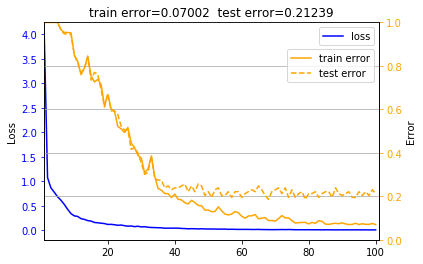

In [126]:
# Plot learning curve and save it as png image
image_path = save_dir / ('result_' + dataset_name + "_" + modelname + '.png')
trainer.plot(image_path=image_path)

In [127]:
# Save parameters
pickle_path = model_dir / (dataset_name + "_" + modelname + '_V' + str(vocab_size) + '_D' + str(wordvec_size) + '_H' + str(hidden_size) + timestamp + '.pkl')
model.save_params(file_name=pickle_path)

## 確信度の取得

In [177]:
model.load_params(file_name=str(pickle_path))

In [484]:
# Inference with certainty factor
start_id = seq.start_id
sample_size = seq.t_length
guess_train, cf_train = model.generate_with_cf(x_train, start_id, sample_size)
guess_test, cf_test = model.generate_with_cf(x_test, start_id, sample_size)

In [485]:
# 保存ファイルのファイル名生成
modelname = model.__class__.__name__
timestamp = datetime.now().strftime("_%y%m%d_%H%M")
save_dir = result_dir / (dataset_name + timestamp)
os.makedirs(save_dir, exist_ok=True)

In [488]:
# Save result as csv
result_train_csv = save_dir /  ("result_" + dataset_name + "_" + modelname + "_train.csv")
result_test_csv = save_dir / ("result_" + dataset_name + "_" + modelname + "_test.csv")
df_result_train = seq.result_to_csv(result_train_csv, x_train, t_train, guess_train, cf=cf_train, encoding=encoding)
df_result_test = seq.result_to_csv(result_test_csv, x_test, t_test, guess_test, cf=cf_test, encoding=encoding)

Accuracy: 0.898471615720524
Accuracy: 0.8627450980392157


In [109]:
def cf_filter(df):
    for factor in np.arange(0.90, 1.00, 0.01):
        print("cf={:.2f}".format(factor))
        print(" correct   :", df.query('correct == 1 and cf < {}'.format(factor)).shape[0])
        print(" incorrect :", df.query('correct == 0 and cf < {}'.format(factor)).shape[0])

In [342]:
cf_filter(df_result_train)

cf=0.90
 correct   : 4
 incorrect : 5
cf=0.91
 correct   : 4
 incorrect : 5
cf=0.92
 correct   : 5
 incorrect : 5
cf=0.93
 correct   : 7
 incorrect : 7
cf=0.94
 correct   : 7
 incorrect : 7
cf=0.95
 correct   : 12
 incorrect : 16
cf=0.96
 correct   : 19
 incorrect : 20
cf=0.97
 correct   : 40
 incorrect : 30
cf=0.98
 correct   : 93
 incorrect : 56
cf=0.99
 correct   : 223
 incorrect : 80


In [277]:
cf_filter(df_result_test)

cf=0.90
 correct   : 0
 incorrect : 0
cf=0.91
 correct   : 0
 incorrect : 0
cf=0.92
 correct   : 0
 incorrect : 0
cf=0.93
 correct   : 0
 incorrect : 0
cf=0.94
 correct   : 0
 incorrect : 0
cf=0.95
 correct   : 0
 incorrect : 0
cf=0.96
 correct   : 0
 incorrect : 0
cf=0.97
 correct   : 0
 incorrect : 0
cf=0.98
 correct   : 0
 incorrect : 0
cf=0.99
 correct   : 88
 incorrect : 14


In [430]:
corrects = df_result_train['correct'].value_counts()
corrects

1    823
0     93
Name: correct, dtype: int64

In [196]:
def accuracy(df, cf):
    df_passed = df.query('cf > {}'.format(cf))
    if len(df_passed) > 0:
        nb_corrects = df_passed['correct'].value_counts()[1]
        return nb_corrects / len(df_passed)
    else:
        return 0

In [135]:
def passing_rate(df, cf):
    nb_passing = len(df.query('cf >= {}'.format(cf)))
    return nb_passing / len(df)

In [526]:
accuracy(df_result_test, 0.992)

0.9827586206896551

In [527]:
passing_rate(df_result_test, 0.992)

0.5686274509803921

In [489]:
def accuracy_by_cf(df):
    acc_list = []
    pr_list = []
    for cf in np.arange(0.90, 1.00, 0.001):
#         print("cf={:.2f}".format(cf))
        acc = accuracy(df, cf)
        pr  = passing_rate(df, cf)
#         print("  Accuracy     :", acc)
#         print("  Passing rate :", pr)
        acc_list.append(acc)
        pr_list.append(pr)
    return acc_list, pr_list

In [490]:
acc_train, pr_train = accuracy_by_cf(df_result_train)

In [491]:
acc_test, pr_test = accuracy_by_cf(df_result_test)

[]

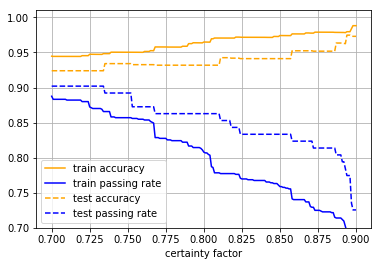

In [469]:
x = np.arange(0.90, 1.00, 0.001)
fig, ax = plt.subplots()
color_acc = 'orange'
color_pr = 'blue'
ax.plot(x, acc_train, color=color_acc, label='train accuracy')
ax.plot(x, pr_train, color=color_pr, label='train passing rate')
ax.plot(x, acc_test, color=color_acc, linestyle='dashed', label='test accuracy')
ax.plot(x, pr_test, color=color_pr, linestyle='dashed', label='test passing rate')
ax.grid(True)
plt.xlabel('certainty factor')
ax.set_ylim(0.7, 1.01)
ax.legend()
plt.savefig('./accuracy_and_passing-rate.png')
plt.plot()